# DATATHON ACCENTURE

Authors: 
- Víctor Aguado Martínez (www.linkedin.com/in/vaguado)
- Bernat Català Ulied (www.linkedin.com/in/bernat-catala-ulied)
- Joan Pau Gutiérrez Pascual (www.linkedin.com/in/joan-pau)

## Imports and settings

In [349]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [350]:
# Fancy settings
sns.set()

## Reading Data

In [351]:
# read train data
df_orders = pd.read_csv("orders.csv", sep=";")
df_products = pd.read_csv("product_attributes.csv", sep=",")
df_dists = pd.read_csv("cities_data.csv", sep=";")

# read test data
df_test = pd.read_csv("test.csv", sep=";")

## Exploratory Data Analysis 
### Orders Dataset

In [352]:
df_orders.head()

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,583,True
1,45f906331e10,Rotterdam,v_004,CRF,Rome,Marseille,1644308,459,False
2,ac84a6e4af0f,Athens,v_002,CRF,Venlo,Paris,1684170,464,True
3,f5e98cb29790,Rotterdam,v_004,CRF,Lille,Milan,1620510,678,False
4,a9e7c9bee35b,Barcelona,v_002,CRF,Venlo,Berlin,1699372,353,False


In [353]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114276 entries, 0 to 114275
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   order_id            114276 non-null  object
 1   origin_port         114276 non-null  object
 2   3pl                 114276 non-null  object
 3   customs_procedures  114276 non-null  object
 4   logistic_hub        113227 non-null  object
 5   customer            114276 non-null  object
 6   product_id          114276 non-null  int64 
 7   units               114276 non-null  int64 
 8   late_order          114276 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 7.1+ MB


In [354]:
df_orders.shape

(114276, 9)

In [355]:
df_orders.isnull().sum()

order_id                 0
origin_port              0
3pl                      0
customs_procedures       0
logistic_hub          1049
customer                 0
product_id               0
units                    0
late_order               0
dtype: int64

In [356]:
df_orders.describe()

,product_id,units
count,1.142760e+05,114276.000000
mean,1.673412e+06,484.915310
std,5.805043e+04,68.387351
min,-1.000000e+00,1.000000
25%,1.658528e+06,447.000000
50%,1.681687e+06,486.000000
75%,1.692987e+06,522.000000
max,1.702654e+06,951.000000


#### Numerical variables

<AxesSubplot:>

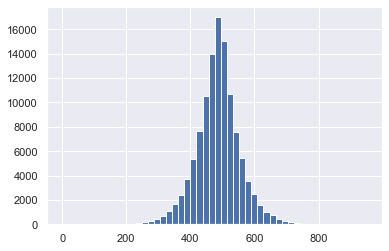

In [357]:
df_orders['units'].hist(bins=50)

In [358]:
print("Total duplicated rows: ", sum(df_orders.duplicated()))
print("#Unique products", len(df_orders['product_id'].value_counts()))

Total duplicated rows:  0
#Unique products 770


By inspection, we see that there are some product id values set to -1. We see that the proportion of late order still the same and decide to drop that rows as they represent less than 1% of the dataset.

In [359]:
print(df_orders[df_orders['product_id'] == -1 ].late_order.value_counts(normalize=True))
df_orders.drop(df_orders[df_orders['product_id'] == -1 ].index, inplace=True)
df_orders

False    0.720339
True     0.279661
Name: late_order, dtype: float64


,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,583,True
1,45f906331e10,Rotterdam,v_004,CRF,Rome,Marseille,1644308,459,False
2,ac84a6e4af0f,Athens,v_002,CRF,Venlo,Paris,1684170,464,True
3,f5e98cb29790,Rotterdam,v_004,CRF,Lille,Milan,1620510,678,False
4,a9e7c9bee35b,Barcelona,v_002,CRF,Venlo,Berlin,1699372,353,False
...,...,...,...,...,...,...,...,...,...
114271,3f4b15fb770e,Rotterdam,v_002,CRF,Dusseldorf,Bordeaux,1681376,645,False
114272,d2e6978a38fd,Barcelona,v_004,DTD,Dusseldorf,Berlin,1676942,502,False
114273,b88babd5c7bd,Rotterdam,v_002,DTP,Dusseldorf,Rome,1692737,464,False
114274,b0b5c761613f,Barcelona,v_003,DTD,Dusseldorf,Munich,1699974,388,False


#### Categorical Variables

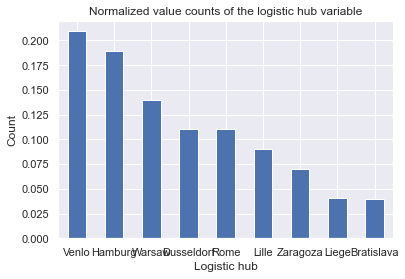

In [360]:
categorical_orders = ['order_id', 'origin_port', '3pl', 'customs_procedures', 'logistic_hub',
       'customer', 'late_order']
df_orders['logistic_hub'].value_counts( normalize=True).plot(kind="bar")
plt.title("Normalized value counts of the logistic hub variable")
plt.xlabel("Logistic hub")
plt.xticks(rotation=0)
plt.ylabel("Count") 
plt.show()

In [361]:
df_orders['logistic_hub'].isnull().sum()/df_orders.shape[0]

0.009189018728429019

We will drop nulls as they represent 0.9% of the total rows and we don't see a significant effect on the target variable.

In [362]:
df_orders_null = df_orders[df_orders['logistic_hub'].isnull()]
df_orders_null['origin_port'].value_counts()
df_orders_null['late_order'].value_counts(normalize=True)
train_df = df_orders.dropna().copy()


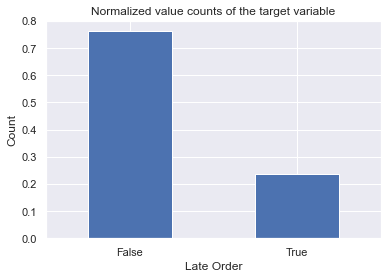

In [363]:
df_orders['late_order'].value_counts(normalize=True).plot(kind='bar')
plt.title("Normalized value counts of the target variable")
plt.xlabel("Late Order")
plt.xticks(rotation=0)
plt.ylabel("Count") 
plt.show()

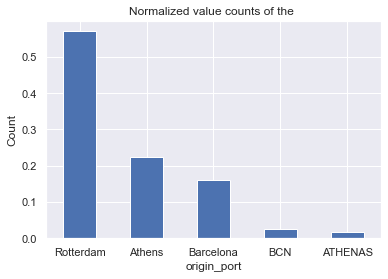

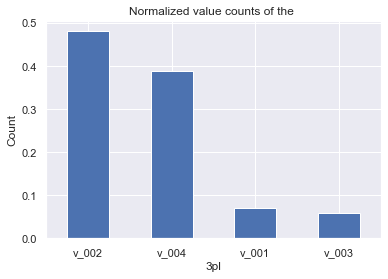

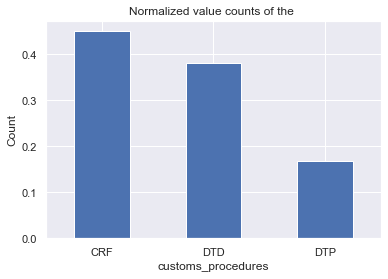

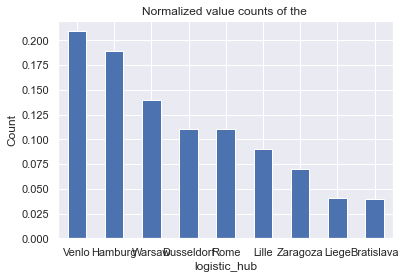

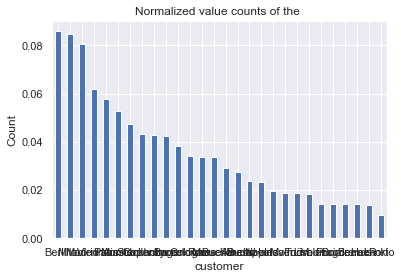

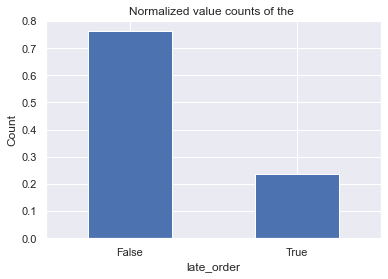

In [364]:
categorical_orders = [ 'origin_port', '3pl', 'customs_procedures', 'logistic_hub',
       'customer', 'late_order']
    
for cat_variable in categorical_orders:
    df_orders[cat_variable].value_counts(normalize=True).plot(kind='bar')
    plt.title("Normalized value counts of the ")
    plt.xlabel(str(cat_variable))
    plt.xticks(rotation=0)
    plt.ylabel("Count") 
    plt.show()

We aggregate origins that present different names but same place

In [365]:
train_df.loc[train_df.origin_port == 'BCN', 'origin_port'] = "Barcelona"
train_df.loc[train_df.origin_port == 'ATHENAS', 'origin_port'] = "Athens"

train_df['origin_port'].value_counts()

Rotterdam    64178
Athens       27529
Barcelona    21402
Name: origin_port, dtype: int64

<AxesSubplot:xlabel='origin_port', ylabel='count'>

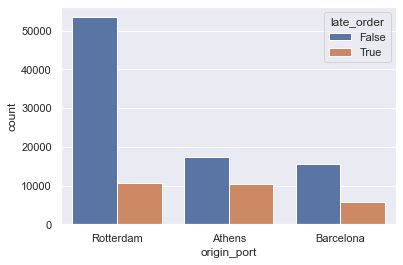

In [366]:
sns.countplot(data=train_df,x='origin_port', hue='late_order')

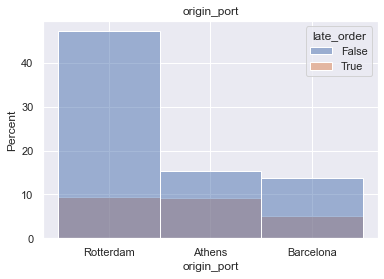

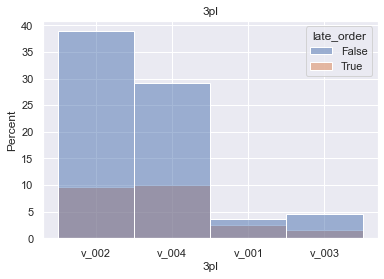

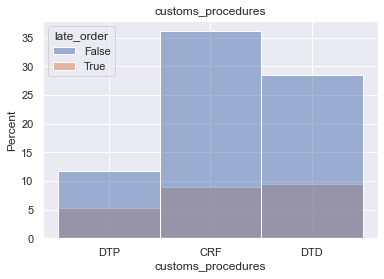

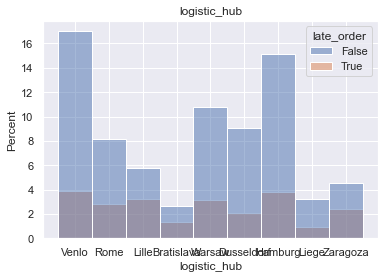

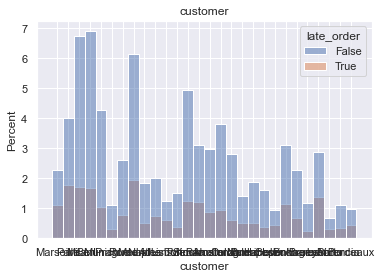

In [367]:
categorical_orders = [ 'origin_port', '3pl', 'customs_procedures', 'logistic_hub',
       'customer']
       
for cat_variable in categorical_orders:
    sns.histplot(data=train_df,x=cat_variable, hue='late_order',stat='percent')
    plt.title(cat_variable)
    plt.show()

### Products Dataset

In [368]:
df_products.head()

,product_id,weight,material_handling
0,1672707,2876,3
1,1694456,2785,5
2,1682865,2751,3
3,1689146,2736,0
4,1664069,2707,4


In [369]:
df_products.isnull().sum()

product_id           0
weight               0
material_handling    0
dtype: int64

In [370]:
df_products.duplicated().sum()

0

In [371]:
df_products[df_products['product_id'] == -1].sum()

product_id           0.0
weight               0.0
material_handling    0.0
dtype: float64

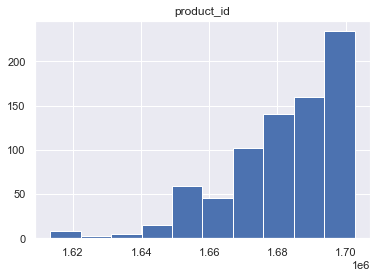

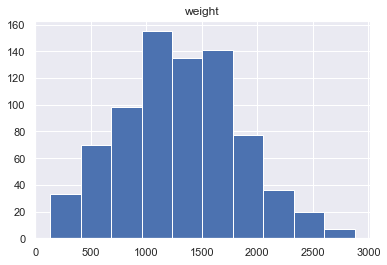

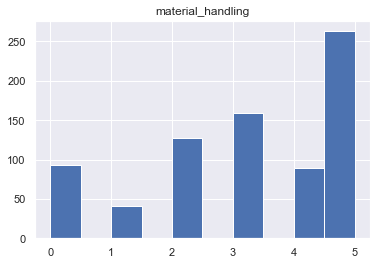

In [372]:
for col in df_products.columns:
    df_products[col].hist()
    plt.title(col)
    plt.show()

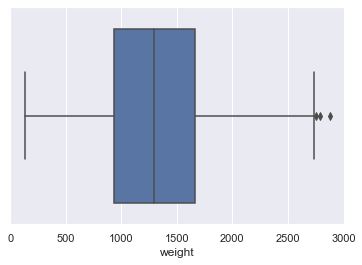

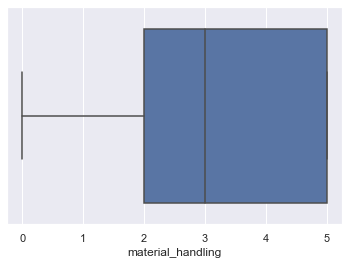

In [373]:
sns.boxplot(data=df_products, x="weight")
plt.show()
sns.boxplot(data=df_products, x="material_handling")
plt.show()

In [374]:
# MERGE DATASET
merged_df = train_df.merge(df_products)

In [375]:
merged_df

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,weight,material_handling
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,583,True,1778,5
1,088f2e0d2138,Barcelona,v_004,DTD,Hamburg,Milan,1692723,385,False,1778,5
2,8ffc8fd4719e,Rotterdam,v_004,CRF,Dusseldorf,Amsterdam,1692723,484,False,1778,5
3,9efa143a9a01,Rotterdam,v_004,DTP,Rome,Cologne,1692723,408,False,1778,5
4,02532624e5c2,Athens,v_004,DTP,Lille,Bucharest,1692723,526,False,1778,5
...,...,...,...,...,...,...,...,...,...,...,...
113104,47925983b3db,Rotterdam,v_004,CRF,Hamburg,Milan,1699562,460,False,386,2
113105,1a3b7ad82a7f,Athens,v_002,CRF,Liege,Berlin,1699562,471,False,386,2
113106,4db0de8d7b2a,Athens,v_002,DTD,Venlo,Copenhagen,1682594,581,False,1131,5
113107,eee4f5251165,Athens,v_004,CRF,Hamburg,Milan,1666470,459,False,896,0


### Distances Dataset

In [376]:
df_dists.shape

(666, 5)

In [377]:
df_dists.head()

,city_from_name,city_to_name,city_from_coord,city_to_coord,distance
0,Dusseldorf,Zaragoza,"(51.2254018, 6.7763137)","(41.6521342, -0.8809428)",1214.4772
1,Dusseldorf,Venlo,"(51.2254018, 6.7763137)","(51.39244885, 6.1511724144122955)",47.3876
2,Dusseldorf,Bratislava,"(51.2254018, 6.7763137)","(48.1516988, 17.1093063)",819.2894
3,Dusseldorf,Hamburg,"(51.2254018, 6.7763137)","(53.550341, 10.000654)",339.2215
4,Dusseldorf,Rome,"(51.2254018, 6.7763137)","(41.8933203, 12.4829321)",1125.0290


In [378]:
df_dists[['city_from_name','city_to_name']].duplicated().sum()

0

## Data Preparation
### Train set

In [379]:
# Example of a distance query
df_dists[( (df_dists['city_from_name'] == 'Rotterdam') & (df_dists['city_to_name'] == 'Rome') ) |  (df_dists['city_from_name'] == 'Rome') & (df_dists['city_to_name'] == 'Rotterdam')  ]['distance']

635    1269.2365
Name: distance, dtype: float64

We will merge the train data frame with the distances between logistical hub, origin and destination of final customer. 

In [380]:
distance_1_list = []
distance_2_list = []

for idx,row in merged_df.iterrows():

    distance1 = -1
    distance2 = -1

    origin = row['origin_port'] 
    logistic = row['logistic_hub']
    dest = row['customer']

    if(origin == logistic):
        distance1 = 0

    if(logistic == dest):
        distance2 = 0
    
    if(distance1!= 0):
        distance1 = df_dists[( (df_dists['city_from_name'] == logistic) & (df_dists['city_to_name'] == origin) ) |  (df_dists['city_from_name'] == origin) & (df_dists['city_to_name'] == logistic)  ]['distance']
    if(distance2 != 0):
        distance2 = df_dists[( (df_dists['city_from_name'] == logistic) & (df_dists['city_to_name'] == dest) ) |  (df_dists['city_from_name'] == dest) & (df_dists['city_to_name'] == logistic)  ]['distance']
    
    distance_1_list.append(float(distance1))
    distance_2_list.append(float(distance2))
    
    if (idx+1 % 10000 == 0):
        print("Processed ", idx, "rows")


In [385]:
merged_df['distance1'] = distance_1_list
merged_df['distance2'] = distance_2_list

In [388]:
merged_df.head()

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,late_order,weight,material_handling,distance1,distance2
0,366c7a3d298f,Rotterdam,v_002,DTP,Venlo,Marseille,1692723,583,True,1778,5,130.0459,902.0420
1,088f2e0d2138,Barcelona,v_004,DTD,Hamburg,Milan,1692723,385,False,1778,5,1473.6254,901.2353
2,8ffc8fd4719e,Rotterdam,v_004,CRF,Dusseldorf,Amsterdam,1692723,484,False,1778,5,177.3075,182.1019
3,9efa143a9a01,Rotterdam,v_004,DTP,Rome,Cologne,1692723,408,False,1778,5,1269.2365,1090.6475
4,02532624e5c2,Athens,v_004,DTP,Lille,Bucharest,1692723,526,False,1778,5,2153.5800,1857.0525


We won't be using order_id for training as it is not relevant

In [406]:
TRAIN_DF = merged_df[['origin_port', '3pl', 'customs_procedures', 'logistic_hub',
       'customer', 'units', 'late_order', 'weight',
       'material_handling', 'distance1', 'distance2']].copy()

# DROP PRODUCT ID AND ORDER ID
TRAIN_DF.head()

,origin_port,3pl,customs_procedures,logistic_hub,customer,units,late_order,weight,material_handling,distance1,distance2
0,Rotterdam,v_002,DTP,Venlo,Marseille,583,True,1778,5,130.0459,902.0420
1,Barcelona,v_004,DTD,Hamburg,Milan,385,False,1778,5,1473.6254,901.2353
2,Rotterdam,v_004,CRF,Dusseldorf,Amsterdam,484,False,1778,5,177.3075,182.1019
3,Rotterdam,v_004,DTP,Rome,Cologne,408,False,1778,5,1269.2365,1090.6475
4,Athens,v_004,DTP,Lille,Bucharest,526,False,1778,5,2153.5800,1857.0525


Prepare the dataset for the model

In [407]:
origin_dummies = pd.get_dummies(TRAIN_DF)
TRAIN_DF[origin_dummies.columns] = origin_dummies
TRAIN_DF = TRAIN_DF.loc[:,~TRAIN_DF.columns.isin(['origin_port','3pl','customs_procedures','logistic_hub','customer'])]
TRAIN_DF

,units,late_order,weight,material_handling,distance1,distance2,origin_port_Athens,origin_port_Barcelona,origin_port_Rotterdam,3pl_v_001,...,customer_Munich,customer_Naples,customer_Paris,customer_Porto,customer_Prague,customer_Rome,customer_Stockholm,customer_Turin,customer_Valencia,customer_Vienna
0,583,True,1778,5,130.0459,902.0420,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,385,False,1778,5,1473.6254,901.2353,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,484,False,1778,5,177.3075,182.1019,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,408,False,1778,5,1269.2365,1090.6475,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,526,False,1778,5,2153.5800,1857.0525,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113104,460,False,386,2,414.4489,901.2353,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
113105,471,False,386,2,2008.8628,580.0170,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113106,581,False,1131,5,2029.5726,639.4113,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113107,459,False,896,0,2025.2207,901.2353,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [408]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(TRAIN_DF.to_numpy())
TRAIN_DF = pd.DataFrame(df_scaled, columns=TRAIN_DF.columns)
TRAIN_DF

,units,late_order,weight,material_handling,distance1,distance2,origin_port_Athens,origin_port_Barcelona,origin_port_Rotterdam,3pl_v_001,...,customer_Munich,customer_Naples,customer_Paris,customer_Porto,customer_Prague,customer_Rome,customer_Stockholm,customer_Turin,customer_Valencia,customer_Vienna
0,0.612632,1.0,0.599270,1.0,0.000000,0.325769,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.404211,0.0,0.599270,1.0,0.663977,0.325477,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.508421,0.0,0.599270,1.0,0.023356,0.065765,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.428421,0.0,0.599270,1.0,0.562971,0.393883,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.552632,0.0,0.599270,1.0,1.000000,0.670666,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113104,0.483158,0.0,0.091241,0.4,0.140548,0.325477,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113105,0.494737,0.0,0.091241,0.4,0.928483,0.209471,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113106,0.610526,0.0,0.363139,1.0,0.938717,0.230921,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113107,0.482105,0.0,0.277372,0.0,0.936567,0.325477,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [409]:
TRAIN_DF.to_csv('TRAIN.csv',header=True) # SAVE HOLE TRAIN DATSET. We will later split it for validation

### Test

In [417]:
df_test = pd.read_csv("test.csv", sep=";")
df_test.shape

(28563, 8)

In [418]:
df_test.isnull().sum()

df_test.drop(df_test[df_test['product_id'] == -1 ].index, inplace=True)


In [419]:
df_test = df_test.dropna()

In [420]:
df_test['origin_port'].value_counts()

Rotterdam    16146
Athens        6263
Barcelona     4655
BCN            744
ATHENAS        445
Name: origin_port, dtype: int64

In [421]:
df_test.loc[df_test.origin_port == 'BCN', 'origin_port'] = "Barcelona"
df_test.loc[df_test.origin_port == 'ATHENAS', 'origin_port'] = "Athens"

df_test['origin_port'].value_counts()

Rotterdam    16146
Athens        6708
Barcelona     5399
Name: origin_port, dtype: int64

In [422]:
df_test = df_test.merge(df_products)
df_test

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,weight,material_handling
0,0e364fa5c795,Rotterdam,v_002,CRF,Warsaw,Munich,1687644,477,1974,5
1,6c8c11251114,Rotterdam,v_002,CRF,Venlo,Barcelona,1687644,414,1974,5
2,81d3be5e1eff,Athens,v_002,DTD,Warsaw,Lyon,1687644,536,1974,5
3,870a9b65a1b5,Rotterdam,v_001,CRF,Dusseldorf,Berlin,1687644,535,1974,5
4,eff072956d66,Rotterdam,v_002,CRF,Rome,Milan,1687644,266,1974,5
...,...,...,...,...,...,...,...,...,...,...
28248,5e5aac335f95,Rotterdam,v_004,CRF,Rome,Porto,1690006,520,1375,5
28249,753fe21cc3cb,Athens,v_002,DTD,Rome,Milan,1697086,431,2009,2
28250,9a4166ebe45d,Rotterdam,v_004,CRF,Dusseldorf,Porto,1652604,495,547,4
28251,7115201bce91,Barcelona,v_003,DTP,Hamburg,Paris,1652604,434,547,4


In [423]:
distance_1_list = []
distance_2_list = []


for idx,row in df_test.iterrows():

    distance1 = -1
    distance2 = -1

    origin = row['origin_port'] 
    logistic = row['logistic_hub']
    dest = row['customer']

    if(origin == logistic):
        distance1 = 0

    if(logistic == dest):
        distance2 = 0
    
    if(distance1!= 0):
        distance1 = df_dists[( (df_dists['city_from_name'] == logistic) & (df_dists['city_to_name'] == origin) ) |  (df_dists['city_from_name'] == origin) & (df_dists['city_to_name'] == logistic)  ]['distance']
    if(distance2 != 0):
        distance2 = df_dists[( (df_dists['city_from_name'] == logistic) & (df_dists['city_to_name'] == dest) ) |  (df_dists['city_from_name'] == dest) & (df_dists['city_to_name'] == logistic)  ]['distance']
    
    distance_1_list.append(float(distance1))
    distance_2_list.append(float(distance2))
    
    if (idx+1 % 10000 == 0):
        print("Processed ", idx, "rows")


In [424]:
df_test['distance1'] = distance_1_list
df_test['distance2'] = distance_2_list

df_test.head()

,order_id,origin_port,3pl,customs_procedures,logistic_hub,customer,product_id,units,weight,material_handling,distance1,distance2
0,0e364fa5c795,Rotterdam,v_002,CRF,Warsaw,Munich,1687644,477,1974,5,1135.6449,816.0497
1,6c8c11251114,Rotterdam,v_002,CRF,Venlo,Barcelona,1687644,414,1974,5,130.0459,1153.4178
2,81d3be5e1eff,Athens,v_002,DTD,Warsaw,Lyon,1687644,536,1974,5,1597.0905,1384.9215
3,870a9b65a1b5,Rotterdam,v_001,CRF,Dusseldorf,Berlin,1687644,535,1974,5,177.3075,477.3717
4,eff072956d66,Rotterdam,v_002,CRF,Rome,Milan,1687644,266,1974,5,1269.2365,477.3222


In [425]:
DF_TEST = df_test[['origin_port', '3pl', 'customs_procedures', 'logistic_hub',
       'customer', 'units', 'weight',
       'material_handling', 'distance1', 'distance2']].copy()

origin_dummies = pd.get_dummies(DF_TEST)
DF_TEST[origin_dummies.columns] = origin_dummies
DF_TEST = DF_TEST.loc[:,~DF_TEST.columns.isin(['origin_port','3pl','customs_procedures','logistic_hub','customer'])]

scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(DF_TEST.to_numpy())
DF_TEST = pd.DataFrame(df_scaled, columns=DF_TEST.columns)
DF_TEST


DF_TEST

,units,weight,material_handling,distance1,distance2,origin_port_Athens,origin_port_Barcelona,origin_port_Rotterdam,3pl_v_001,3pl_v_002,...,customer_Munich,customer_Naples,customer_Paris,customer_Porto,customer_Prague,customer_Rome,customer_Stockholm,customer_Turin,customer_Valencia,customer_Vienna
0,0.421714,0.670803,1.0,0.496952,0.294713,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.349714,0.670803,1.0,0.000000,0.416552,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.489143,0.670803,1.0,0.724991,0.500158,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.488000,0.670803,1.0,0.023356,0.172401,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.180571,0.670803,1.0,0.562971,0.172383,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28248,0.470857,0.452190,1.0,0.562971,0.634954,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28249,0.369143,0.683577,0.4,0.456361,0.172383,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28250,0.442286,0.150000,0.8,0.023356,0.587407,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28251,0.372571,0.150000,0.8,0.663977,0.270107,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [426]:
DF_TEST.to_csv('processed_test.csv', header=True)

## Model Learning
### Training

In [427]:
features = ['units', 'weight', 'material_handling', 'distance1',
       'distance2', 'origin_port_Athens', 'origin_port_Barcelona',
       'origin_port_Rotterdam', '3pl_v_001', '3pl_v_002', '3pl_v_003',
       '3pl_v_004', 'customs_procedures_CRF', 'customs_procedures_DTD',
       'customs_procedures_DTP', 'logistic_hub_Bratislava',
       'logistic_hub_Dusseldorf', 'logistic_hub_Hamburg', 'logistic_hub_Liege',
       'logistic_hub_Lille', 'logistic_hub_Rome', 'logistic_hub_Venlo',
       'logistic_hub_Warsaw', 'logistic_hub_Zaragoza', 'customer_Amsterdam',
       'customer_Athens', 'customer_Barcelona', 'customer_Berlin',
       'customer_Bordeaux', 'customer_Bremen', 'customer_Bucharest',
       'customer_Budapest', 'customer_Cologne', 'customer_Copenhagen',
       'customer_Hanover', 'customer_Helsinki', 'customer_Lisbon',
       'customer_Lyon', 'customer_Madrid', 'customer_Malmö',
       'customer_Marseille', 'customer_Milan', 'customer_Munich',
       'customer_Naples', 'customer_Paris', 'customer_Porto',
       'customer_Prague', 'customer_Rome', 'customer_Stockholm',
       'customer_Turin', 'customer_Valencia', 'customer_Vienna']

In [428]:
X = TRAIN_DF[features]
Y = TRAIN_DF['late_order']


In [429]:
train, test = train_test_split(TRAIN_DF, test_size=0.2)

X_train = train[features]
Y_train = train['late_order']

X_test = test[features]
Y_test = test['late_order']

In [430]:
import statsmodels.api as sm

GLM = sm.GLM(Y_train, X_train, family=sm.families.Binomial())
GLM_results = GLM.fit()


In [431]:
print(GLM_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             late_order   No. Observations:                90487
Model:                            GLM   Df Residuals:                    90439
Model Family:                Binomial   Df Model:                           47
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -43365.
Date:                Sat, 12 Nov 2022   Deviance:                       86731.
Time:                        20:07:16   Pearson chi2:                 9.11e+04
No. Iterations:                   100   Pseudo R-squ. (CS):             0.1297
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
units                     

### Validation

In [432]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_train, GLM_results.predict())
false_positive_rate2, true_positive_rate2, threshold1 = roc_curve(Y_test, GLM_results.predict(X_test))

In [433]:
print('TRAIN roc_auc_score for GLM: ', roc_auc_score(Y_train, GLM_results.predict())*100)
print('TEST roc_auc_score for GLM: ', roc_auc_score(Y_test,  GLM_results.predict(X_test))*100)


TRAIN roc_auc_score for GLM:  73.82758375019229
TEST roc_auc_score for GLM:  74.27845930075144


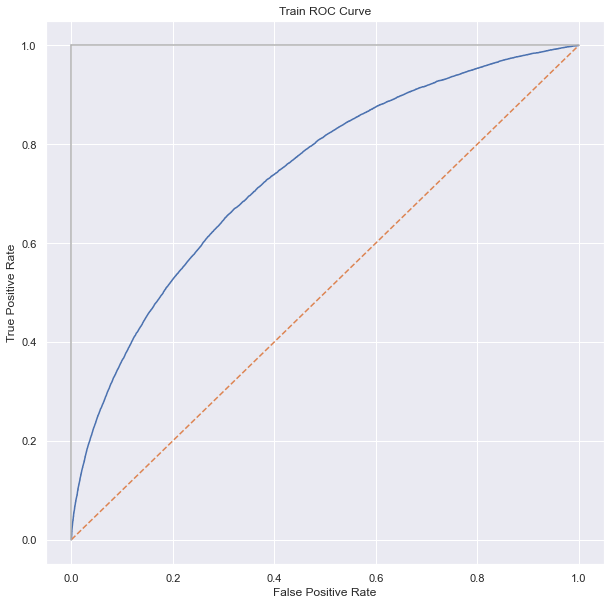

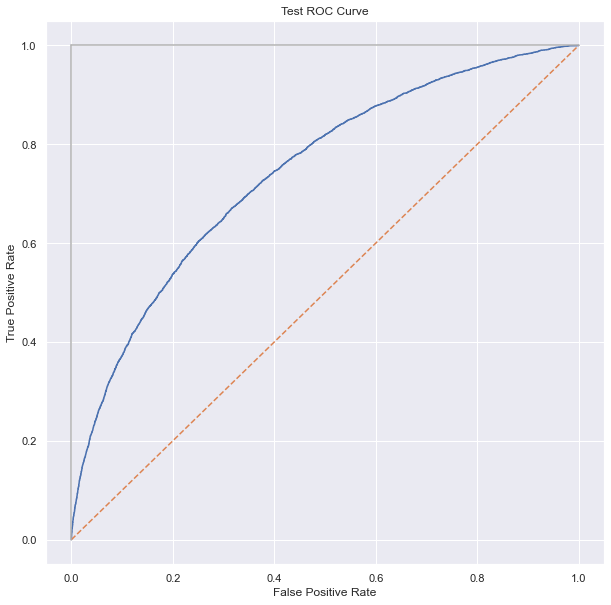

In [435]:
plt.subplots(1, figsize=(10,10))
plt.title('Train ROC Curve')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.subplots(1, figsize=(10,10))
plt.title('Test ROC Curve')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [436]:
predicted_y = []
for proba in GLM_results.predict():
    if(proba > 0.5):
        predicted_y.append(1)
    else:
        predicted_y.append(0)

test_predicted_y = []
for proba in GLM_results.predict(X_test):
    if(proba > 0.5):
        test_predicted_y.append(1)
    else:
        test_predicted_y.append(0)

In [437]:
from sklearn.metrics import accuracy_score


print("Train Acc:",accuracy_score(Y_train,predicted_y))
print("Test Acc:", accuracy_score(Y_test,test_predicted_y))

Train Acc: 0.7823112712323317
Test Acc: 0.7864026169215808


## Submission

In [274]:
predicted_y = []
for proba in GLM_results.predict(DF_TEST):
    if(proba > 0.5):
        predicted_y.append(1)
    else:
        predicted_y.append(0)

In [275]:
DF_TEST

,units,weight,material_handling,distance1,distance2,origin_port_Athens,origin_port_Barcelona,origin_port_Rotterdam,3pl_v_001,3pl_v_002,...,customer_Munich,customer_Naples,customer_Paris,customer_Porto,customer_Prague,customer_Rome,customer_Stockholm,customer_Turin,customer_Valencia,customer_Vienna
0,477,1974,5,1135.6449,816.0497,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
1,414,1974,5,130.0459,1153.4178,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,536,1974,5,1597.0905,1384.9215,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,535,1974,5,177.3075,477.3717,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,266,1974,5,1269.2365,477.3222,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28248,520,1375,5,1269.2365,1758.1663,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
28249,431,2009,2,1053.5083,477.3222,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
28250,495,547,4,177.3075,1626.5104,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
28251,434,547,4,1473.6254,747.9185,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [276]:
submission = pd.DataFrame({"order_id": df_test.order_id, "late_order": predicted_y})
submission.to_csv("submission.csv", index=False)